In [ ]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
koreanize_matplotlib.koreanize()

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
busan_od = pd.read_csv('부산광역시_od.csv')
busan_stay = pd.read_csv('부산광역시_stay.csv')

In [ ]:
choryang_id = [2617051000, 2617052000, 2617053000]

In [ ]:
choryang_1st = busan_od[busan_od['dest_hdong_cd'] == choryang_id[0]]
choryang_2nd = busan_od[busan_od['dest_hdong_cd'] == choryang_id[1]]
choryang_3rd = busan_od[busan_od['dest_hdong_cd'] == choryang_id[2]]

## 초량 2동 예시

In [ ]:
choryang_2nd = choryang_2nd.drop(['origin_hdong_cd_시도명','origin_hdong_cd_시군구명','origin_hdong_cd_읍면동명','dest_hdong_cd_시도명','dest_hdong_cd_시군구명','dest_hdong_cd_읍면동명','dest_hdong_cd','origin_purpose'], axis=1)
choryang_2nd = choryang_2nd.drop(['date','origin_hdong_cd','start_time','od_dist_avg', 'od_duration_avg'], axis=1)

In [ ]:
expanded_data = choryang_2nd.loc[choryang_2nd.index.repeat(choryang_2nd['od_cnts'])].reset_index(drop=True)
expanded_data = expanded_data.drop(columns=['od_cnts'])
expanded_data

,end_time,gender,age,modal,dest_purpose,weekday,is_holiday,is_weekend
0,20:00,여성,30대,차량,기타,금,평일,평일
1,20:00,여성,30대,차량,기타,금,평일,평일
2,20:00,여성,30대,차량,기타,금,평일,평일
3,20:00,여성,30대,차량,기타,금,평일,평일
4,20:00,여성,30대,차량,기타,금,평일,평일
...,...,...,...,...,...,...,...,...
469575,11:00,여성,50대,차량,기타,일,평일,주말
469576,11:00,여성,50대,차량,기타,일,평일,주말
469577,11:00,여성,50대,차량,기타,일,평일,주말
469578,11:00,여성,50대,차량,기타,일,평일,주말


In [ ]:
from kmodes.kmodes import KModes

k_modes = KModes(n_clusters=3, init='Huang', n_init=1, verbose=1, random_state=4321)
expanded_data['cluster'] = k_modes.fit_predict(expanded_data)
expanded_data

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 91106, cost: 1685208.0


,end_time,gender,age,modal,dest_purpose,weekday,is_holiday,is_weekend,cluster
0,20:00,여성,30대,차량,기타,금,평일,평일,0
1,20:00,여성,30대,차량,기타,금,평일,평일,0
2,20:00,여성,30대,차량,기타,금,평일,평일,0
3,20:00,여성,30대,차량,기타,금,평일,평일,0
4,20:00,여성,30대,차량,기타,금,평일,평일,0
...,...,...,...,...,...,...,...,...,...
469575,11:00,여성,50대,차량,기타,일,평일,주말,0
469576,11:00,여성,50대,차량,기타,일,평일,주말,0
469577,11:00,여성,50대,차량,기타,일,평일,주말,0
469578,11:00,여성,50대,차량,기타,일,평일,주말,0


In [ ]:
columns_to_encode = expanded_data.columns.difference(['cluster'])
encoder = OneHotEncoder(sparse=False)

expanded_encoded_data = pd.DataFrame(encoder.fit_transform(expanded_data[columns_to_encode]), columns=encoder.get_feature_names_out(columns_to_encode))
expanded_encoded_data = pd.concat([expanded_encoded_data, expanded_data[['cluster']]], axis=1)
expanded_encoded_data

,age_10대,age_20대,age_30대,age_40대,age_50대,age_60대,age_70대,age_80세이상,age_9세이하,dest_purpose_귀가,...,modal_철도,modal_항공기,weekday_금,weekday_목,weekday_수,weekday_월,weekday_일,weekday_토,weekday_화,cluster
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469575,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
469576,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
469577,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
469578,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


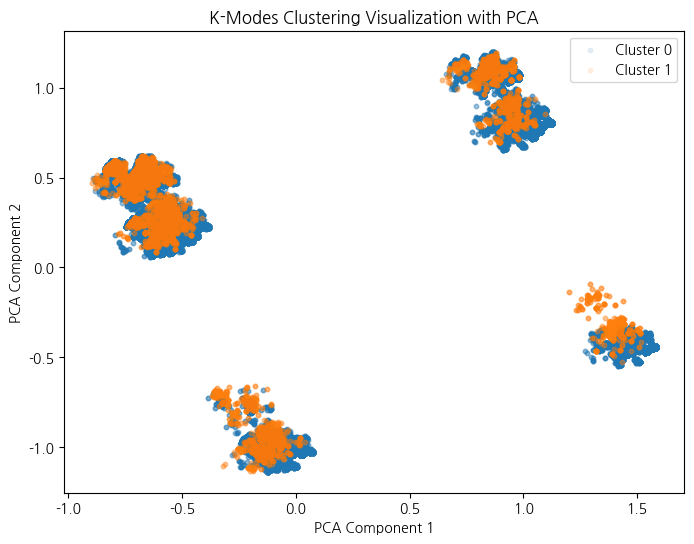

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(expanded_encoded_data.drop(['cluster'], axis=1))

unique_clusters = np.unique(expanded_encoded_data['cluster'])

plt.figure(figsize=(8, 6))

for cluster in unique_clusters[:2]:
    cluster_data = pca_result[expanded_encoded_data['cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {int(cluster)}', s=10, alpha=0.1)

plt.title('K-Modes Clustering Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='best')

plt.show()

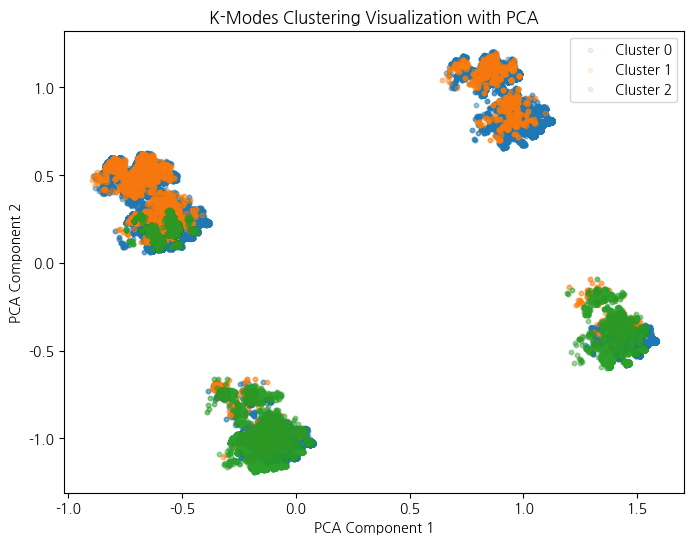

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(expanded_encoded_data.drop(['cluster'], axis=1))

unique_clusters = np.unique(expanded_encoded_data['cluster'])

plt.figure(figsize=(8, 6))

for cluster in unique_clusters:
    cluster_data = pca_result[expanded_encoded_data['cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {int(cluster)}', s=10, alpha=0.1)

plt.title('K-Modes Clustering Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='best')

plt.show()

In [ ]:
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=expanded_encoded_data.drop(['cluster'],axis=1).columns)
filtered_pca_loadings = pca_loadings[(pca_loadings['PCA1'] * pca_loadings['PCA2']) < 0]
sorted_filtered_pca_loadings = filtered_pca_loadings.reindex(filtered_pca_loadings.abs().sort_values(by=['PCA2', 'PCA1'], ascending=False).index)
sorted_filtered_pca_loadings

,PCA1,PCA2
gender_남성,0.229100,-0.625188
gender_여성,-0.229100,0.625188
age_50대,-0.071233,0.174194
age_40대,-0.073150,0.152943
age_30대,0.022412,-0.145484
age_20대,0.069783,-0.096678
age_9세이하,0.029198,-0.054969
modal_차량,0.021167,-0.042745
modal_시내버스,-0.003997,0.028643
age_10대,0.025844,-0.027472
